# Big Mini Project - Problem 3
### Jamie Earle 2205021

In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt

### Goal: 

I want to do a few things with code for this project. I want to make the game playable which I can use for specialisation and testing of methods and ideas for who will have a winning strategy. I want to have random games be playable for random specialisation specifically, and the results of random games might be of interest to me, who is more likely to win if Both players play randomly? I not only want to be able to play against the computer, but to have the computer play itself strategically in order to test and check strategies I come up with on Pen and Paper.

First, let me build a simple model of a game where both players play randomly, which will be a useful start to any code I use and will help me randomly specialise seeing some example games, and may be useful in extensions later.

Note: I need a maximum number of rounds or the game could go on forever if Ali doesn't ever win 

In [7]:
n = 5
glasses = np.zeros(n) 
rounds=100

for i in range(rounds):
    #Alis turn
    x = np.random.rand(n) #produce n random numnbers
    sf = np.dot(x,np.ones(n)) #find their sum
    adding = x/(2*sf) #divide x by twice its component sum, so its total is 1/2 a pint for Ali
    glasses += adding #add scaled amounts to glasses
    print("After Ali's turn")
    print(glasses) 
    
    #Beths turn
    k = np.random.randint(0,n) #pick a random glass
    
    if k == n-1:
        glasses[k] = 0 #if its the last glass remove the first aswell
        glasses[0]=0
    else:
        glasses[k]=0 #remove the glass and the one on the right
        glasses[k+1] = 0
    print("After Beth's turn")
    print(glasses)
    if max(glasses) > 1:
        print("Ali Wins in", i, "rounds")
        break
    if i == rounds -1:
        #print("glasses")
        print("out of turns")
        

print("Game Over")

After Ali's turn
[0.0724308  0.12438204 0.05811235 0.14450344 0.10057137]
After Beth's turn
[0.0724308  0.         0.         0.14450344 0.10057137]
After Ali's turn
[0.17073225 0.06645461 0.12090866 0.35634501 0.10306507]
After Beth's turn
[0.         0.06645461 0.12090866 0.35634501 0.        ]
After Ali's turn
[0.04369539 0.1858842  0.30778232 0.42197229 0.08437409]
After Beth's turn
[0.04369539 0.         0.         0.42197229 0.08437409]
After Ali's turn
[0.2235269  0.06688741 0.16600992 0.42900294 0.1646146 ]
After Beth's turn
[0.2235269  0.         0.         0.42900294 0.1646146 ]
After Ali's turn
[0.38569097 0.14335878 0.07256101 0.45057257 0.26496111]
After Beth's turn
[0.38569097 0.         0.         0.45057257 0.26496111]
After Ali's turn
[0.57164971 0.05707353 0.03976572 0.5128444  0.41989129]
After Beth's turn
[0.57164971 0.         0.         0.5128444  0.41989129]
After Ali's turn
[0.74135415 0.11279722 0.0116916  0.59486017 0.54368227]
After Beth's turn
[0.         0.

Ran the above a few times to see some examples of how a game could play out.

Now I want to build a playable game where I can play as Ali against Beth. First I will have her play randomly for simplicity then give her a reasonable strategy I come up with in the Rubric.

In [9]:
#Now lets start to build up our game - basic setup first
n = 5
glasses=np.zeros(n)
print(glasses)
HUMAN = 0
BOT = 1
total_poured = 0

  
def check_entry(i): #checks entry is within number of glasses. If I wanted I could do more checks to make sure i is of correct type,
                    #hopefully player is reasonable
    if 1<= i <= n:
            return i
    else:
        i = int(input(f"Not in range. Give me a glass between 1 and {n} inclusive."))
        return check_entry(i)

    
    
def check_amount(j,total_poured):
    
    if 0<=j<=0.5001-total_poured: #each time he pours some of his 0.5 between each of the glasses, check hes only using 0.5 total
        return j
    else:
        j = float(input(f"Not in range. Need an amount between 0 and {0.5-total_poured} a pint.")) #otherwise throw error
        return check_amount(j,total_poured)
    
#need a function to check when game is complete
def check_complete(glasses):
    if max(glasses) > 1:
        return 0
    else:
        return 1

    

#the actual game
def game(player):
    global glasses
    global total_poured
    
    
    if player == HUMAN:
        
        if check_complete(glasses) == 0: #check if game is over
            print(glasses)
            print("You win!")
            return 0
        
        elif total_poured >=0.5: #once Ali (you) pour over 0.5, its BOT (Beth's) turn
            game(BOT)
        
        else:   
            i = int(input("What glass would you like to add to?")) #which glass
            check_val = int(check_entry(i))
            
            j = float(input("How much would you like to add?")) #how much
            check_amount_ = check_amount(j,total_poured)
            
            
            glasses[check_val-1] +=check_amount_ #add to correct glass
            total_poured += check_amount_ #update how much of the 0.5 Ali has used this turn
            print("you have poured", total_poured, "this turn") #printing
            print(glasses)
            game(HUMAN) #repeat human turn, it will then check if he has won and if he used his 0.5, if he has any left and hasnt won he can pour more
                        #into another glass, repeating until he uses 0.5, then on the next run of his turn itll flag and become Beths turn
            
           
            
    if player == BOT: #bot should choose random pair of adjacent glasses
        
        total_poured = 0 #return total poured to 0 for Alis next turn
        
        k = np.random.randint(0,n) #same as random game from before
            
        if k == n-1:
            glasses[k] = 0
            glasses[0]=0
            print(f"Bot removes glasses {1} and {k+1}")
        else:
            glasses[k]=0
            glasses[k+1] = 0
            print(f"Bot removes glasses {k+1} and {k+2}")
            

            
        print(glasses)
        game(HUMAN)
        

    
game(HUMAN)

[0. 0. 0. 0. 0.]


What glass would you like to add to? 1
How much would you like to add? 0.5


you have poured 0.5 this turn
[0.5 0.  0.  0.  0. ]
Bot removes glasses 2 and 3
[0.5 0.  0.  0.  0. ]


What glass would you like to add to? 3
How much would you like to add? 0.4


you have poured 0.4 this turn
[0.5 0.  0.4 0.  0. ]


What glass would you like to add to? 1
How much would you like to add? 0.1


you have poured 0.5 this turn
[0.6 0.  0.4 0.  0. ]
Bot removes glasses 4 and 5
[0.6 0.  0.4 0.  0. ]


What glass would you like to add to? 10
Not in range. Give me a glass between 1 and 5 inclusive. 3
How much would you like to add? 0.5


you have poured 0.5 this turn
[0.6 0.  0.9 0.  0. ]
Bot removes glasses 3 and 4
[0.6 0.  0.  0.  0. ]


What glass would you like to add to? 1
How much would you like to add? 0.5


you have poured 0.5 this turn
[1.1 0.  0.  0.  0. ]
[1.1 0.  0.  0.  0. ]
You win!


Now lets do the same, but giving Beth a good strategy to test against. Obviously, if Ali is one move from winning, ie he has a glass over 1/2 full, she should remove that, and furthermore it should remove the one adjacent to that aswell with the most liquid in it. Otherwise, she should remove the pair of glasses with the greatest "pairsum" of liquid as described in Rubric.

In [10]:
def intelligent_Beth(glasses): #returns which glass to remove following strategy
    if max(glasses)>0.5:
        i = np.argmax(glasses)
        if glasses[i+1]>=glasses[i-1]:
            return i
        else:
            return i-1
    else:
        
        pairsums = []
        for j in range(len(glasses)):
            if j < len(glasses)-1:
                pairsums.append(glasses[j]+glasses[j+1])
                
            elif j == len(glasses)-1:
                pairsums.append(glasses[j]+glasses[0])
        #print(pairsums)
        return np.argmax(pairsums)

In [11]:

n = 5
glasses=np.zeros(n)
print(glasses)
HUMAN = 0
BOT = 1
total_poured = 0

  
#the actual game
def game_Beth_smart(player):
    global glasses
    global total_poured
    
    
    if player == HUMAN:
        
        if check_complete(glasses) == 0: #check if game is over
            print(glasses)
            print("You win!")
            return 0
        
        elif total_poured >=0.5: #once Ali (you) pour over 0.5, its BOT (Beth's) turn
            game_Beth_smart(BOT)
        
        else:   
            i = int(input("What glass would you like to add to?")) #which glass
            check_val = int(check_entry(i))
            
            j = float(input("How much would you like to add?")) #how much
            check_amount_ = check_amount(j,total_poured)
            
            
            glasses[check_val-1] +=check_amount_ #add to correct glass
            total_poured += check_amount_ #update how much of the 0.5 Ali has used this turn
            print("you have poured", total_poured, "this turn") #printing
            print(glasses)
            game_Beth_smart(HUMAN) #repeat human turn, it will then check if he has won and if he used his 0.5, if he has any left and hasnt won he can pour more
                        #into another glass, repeating until he uses 0.5, then on the next run of his turn itll flag and become Beths turn
            
           
            
    if player == BOT: #bot should choose strategic pair of adjacent glasses
        
        total_poured = 0 #return total poured to 0 for Alis next turn
        
        k = intelligent_Beth(glasses) #uses strategy function
            
        if k == n-1:
            glasses[k] = 0
            glasses[0]=0
            print(f"Bot removes glasses {1} and {k+1}")
        else:
            glasses[k]=0
            glasses[k+1] = 0
            print(f"Bot removes glasses {k+1} and {k+2}")
            

            
        print(glasses)
        game_Beth_smart(HUMAN)
        

    
game_Beth_smart(HUMAN)

[0. 0. 0. 0. 0.]


What glass would you like to add to? 1
How much would you like to add? 0.5


you have poured 0.5 this turn
[0.5 0.  0.  0.  0. ]
Bot removes glasses 1 and 2
[0. 0. 0. 0. 0.]


What glass would you like to add to? 1
How much would you like to add? 0.25


you have poured 0.25 this turn
[0.25 0.   0.   0.   0.  ]


What glass would you like to add to? 3
How much would you like to add? 0.25


you have poured 0.5 this turn
[0.25 0.   0.25 0.   0.  ]
Bot removes glasses 1 and 2
[0.   0.   0.25 0.   0.  ]


What glass would you like to add to? 1
How much would you like to add? 0.4


you have poured 0.4 this turn
[0.4  0.   0.25 0.   0.  ]


What glass would you like to add to? 3
How much would you like to add? 0.1


you have poured 0.5 this turn
[0.4  0.   0.35 0.   0.  ]
Bot removes glasses 1 and 2
[0.   0.   0.35 0.   0.  ]


What glass would you like to add to? 1
How much would you like to add? 0.4


you have poured 0.4 this turn
[0.4  0.   0.35 0.   0.  ]


What glass would you like to add to? 3
How much would you like to add? 0.1


you have poured 0.5 this turn
[0.4  0.   0.45 0.   0.  ]
Bot removes glasses 2 and 3
[0.4 0.  0.  0.  0. ]


What glass would you like to add to? 3
How much would you like to add? 0.45


you have poured 0.45 this turn
[0.4  0.   0.45 0.   0.  ]


What glass would you like to add to? 1
How much would you like to add? 0.05


you have poured 0.5 this turn
[0.45 0.   0.45 0.   0.  ]
Bot removes glasses 1 and 2
[0.   0.   0.45 0.   0.  ]


What glass would you like to add to? 1
How much would you like to add? 0.45


you have poured 0.45 this turn
[0.45 0.   0.45 0.   0.  ]


What glass would you like to add to? 5
How much would you like to add? 0.05


you have poured 0.5 this turn
[0.45 0.   0.45 0.   0.05]
Bot removes glasses 1 and 5
[0.   0.   0.45 0.   0.  ]


What glass would you like to add to? 1
How much would you like to add? 0.3


you have poured 0.3 this turn
[0.3  0.   0.45 0.   0.  ]


What glass would you like to add to? 2
How much would you like to add? 0.2


you have poured 0.5 this turn
[0.3  0.2  0.45 0.   0.  ]
Bot removes glasses 2 and 3
[0.3 0.  0.  0.  0. ]


What glass would you like to add to? 3
How much would you like to add? 0.1


you have poured 0.1 this turn
[0.3 0.  0.1 0.  0. ]


What glass would you like to add to? 4
How much would you like to add? 0.5
Not in range. Need an amount between 0 and 0.4 a pint. 0.4


you have poured 0.5 this turn
[0.3 0.  0.1 0.4 0. ]
Bot removes glasses 3 and 4
[0.3 0.  0.  0.  0. ]


KeyboardInterrupt: Interrupted by user

In [13]:
#interrupted kernal as I couldn't win and game would go on forever

## Comment after attack phase

By what I complete in the attack phase, it should now be the case Ali can win if glasses $> 6$ but not if less than $5$.

In [12]:
n = 5
total_poured = 0 
glasses = np.zeros(n)
game_Beth_smart(HUMAN)

What glass would you like to add to? 3
How much would you like to add? 0.5


you have poured 0.5 this turn
[0.  0.  0.5 0.  0. ]
Bot removes glasses 2 and 3
[0. 0. 0. 0. 0.]


What glass would you like to add to? 1
How much would you like to add? 0.25


you have poured 0.25 this turn
[0.25 0.   0.   0.   0.  ]


What glass would you like to add to? 3
How much would you like to add? 0.25


you have poured 0.5 this turn
[0.25 0.   0.25 0.   0.  ]
Bot removes glasses 1 and 2
[0.   0.   0.25 0.   0.  ]


What glass would you like to add to? 2
How much would you like to add? 0.1


you have poured 0.1 this turn
[0.   0.1  0.25 0.   0.  ]


What glass would you like to add to? 5
How much would you like to add? 0.4


you have poured 0.5 this turn
[0.   0.1  0.25 0.   0.4 ]
Bot removes glasses 4 and 5
[0.   0.1  0.25 0.   0.  ]


What glass would you like to add to? 5
How much would you like to add? 0.4


you have poured 0.4 this turn
[0.   0.1  0.25 0.   0.4 ]


What glass would you like to add to? 4
How much would you like to add? 0.1


you have poured 0.5 this turn
[0.   0.1  0.25 0.1  0.4 ]
Bot removes glasses 4 and 5
[0.   0.1  0.25 0.   0.  ]


What glass would you like to add to? 1
How much would you like to add? 0.1


you have poured 0.1 this turn
[0.1  0.1  0.25 0.   0.  ]


What glass would you like to add to? 5
How much would you like to add? 0.2


you have poured 0.30000000000000004 this turn
[0.1  0.1  0.25 0.   0.2 ]


What glass would you like to add to? 1
How much would you like to add? 0.1


you have poured 0.4 this turn
[0.2  0.1  0.25 0.   0.2 ]


What glass would you like to add to? 4
How much would you like to add? 0.1


you have poured 0.5 this turn
[0.2  0.1  0.25 0.1  0.2 ]
Bot removes glasses 1 and 5
[0.   0.1  0.25 0.1  0.  ]


What glass would you like to add to? 5
How much would you like to add? 0.2


you have poured 0.2 this turn
[0.   0.1  0.25 0.1  0.2 ]


What glass would you like to add to? 1
How much would you like to add? 0.1


you have poured 0.30000000000000004 this turn
[0.1  0.1  0.25 0.1  0.2 ]


What glass would you like to add to? 2
How much would you like to add? 0.2


you have poured 0.5 this turn
[0.1  0.3  0.25 0.1  0.2 ]
Bot removes glasses 2 and 3
[0.1 0.  0.  0.1 0.2]


KeyboardInterrupt: Interrupted by user

In [14]:
#again had to interupt kernal as I couldnt win and it wouldnt end.

In [19]:
n = 6
total_poured = 0 
glasses = np.zeros(n)
game_Beth_smart(HUMAN)
#do an example game where I win

What glass would you like to add to? 1
How much would you like to add? 0.25


you have poured 0.25 this turn
[0.25 0.   0.   0.   0.   0.  ]


What glass would you like to add to? 3
How much would you like to add? 0.25


you have poured 0.5 this turn
[0.25 0.   0.25 0.   0.   0.  ]
Bot removes glasses 1 and 2
[0.   0.   0.25 0.   0.   0.  ]


What glass would you like to add to? 1
How much would you like to add? 0.25


you have poured 0.25 this turn
[0.25 0.   0.25 0.   0.   0.  ]


What glass would you like to add to? 5
How much would you like to add? 0.25


you have poured 0.5 this turn
[0.25 0.   0.25 0.   0.25 0.  ]
Bot removes glasses 1 and 2
[0.   0.   0.25 0.   0.25 0.  ]


What glass would you like to add to? 1
How much would you like to add? 0.25


you have poured 0.25 this turn
[0.25 0.   0.25 0.   0.25 0.  ]


What glass would you like to add to? 1
How much would you like to add? 0.08333333


you have poured 0.33333333 this turn
[0.33333333 0.         0.25       0.         0.25       0.        ]


What glass would you like to add to? 3
How much would you like to add? 0.08333333


you have poured 0.41666665999999997 this turn
[0.33333333 0.         0.33333333 0.         0.25       0.        ]


What glass would you like to add to? 5
How much would you like to add? 0.0833333333


you have poured 0.4999999933 this turn
[0.33333333 0.         0.33333333 0.         0.33333333 0.        ]


What glass would you like to add to? 1
How much would you like to add? 0.0001


you have poured 0.5000999933 this turn
[0.33343333 0.         0.33333333 0.         0.33333333 0.        ]
Bot removes glasses 1 and 2
[0.         0.         0.33333333 0.         0.33333333 0.        ]


What glass would you like to add to? 1
How much would you like to add? 0.33333333


you have poured 0.33333333 this turn
[0.33333333 0.         0.33333333 0.         0.33333333 0.        ]


What glass would you like to add to? 1
How much would you like to add? 0.055555


you have poured 0.38888833 this turn
[0.38888833 0.         0.33333333 0.         0.33333333 0.        ]


What glass would you like to add to? 3
How much would you like to add? 0.055555555


you have poured 0.444443885 this turn
[0.38888833 0.         0.38888888 0.         0.33333333 0.        ]


What glass would you like to add to? 5
How much would you like to add? 0.05555555


you have poured 0.499999435 this turn
[0.38888833 0.         0.38888888 0.         0.38888888 0.        ]


What glass would you like to add to? 5
How much would you like to add? 0.0001


you have poured 0.500099435 this turn
[0.38888833 0.         0.38888888 0.         0.38898888 0.        ]
Bot removes glasses 4 and 5
[0.38888833 0.         0.38888888 0.         0.         0.        ]


What glass would you like to add to? 1
How much would you like to add? 0.25


you have poured 0.25 this turn
[0.63888833 0.         0.38888888 0.         0.         0.        ]


What glass would you like to add to? 3
How much would you like to add? 0.25


you have poured 0.5 this turn
[0.63888833 0.         0.63888888 0.         0.         0.        ]
Bot removes glasses 3 and 4
[0.63888833 0.         0.         0.         0.         0.        ]


What glass would you like to add to? 1
How much would you like to add? 0.5


you have poured 0.5 this turn
[1.13888833 0.         0.         0.         0.         0.        ]
[1.13888833 0.         0.         0.         0.         0.        ]
You win!


Now, given the strategy I derived for Ali, I would like to code this strategy and then give it to him to have the computer play against itself

In [20]:
def intelligent_Ali(glasses):
    #Ali wants to fill 3 non-adjacent glasses until over 1/4
    #then 2 over 1/2
    #then overfill one glass
    #return which glasses to fill, in the game we'll work out how much to fill them by
    
    if max(glasses)>0.5: 
        return [np.argmax(glasses)] #win
    else:
        quad_glasses = 4*np.array(glasses)
        indicator_list = np.floor(quad_glasses) #indiciates whether glasses are >= 1/4 full
        
        x = sum(indicator_list)
        
        if x >=2: #we have over 2 glasses 1/4 full
            #return the 2 remaining glasses over 1/4
            outputs = []
            for i in range(len(glasses)):
                if indicator_list[i] >= 1:
                    outputs.append(i)
            return [outputs[0],outputs[1]]
                
            
            #could return more than 2, so just fill the first two non adjacent ones 
                
        else:
            #build to 3 non-adjacent glasses with over 1/4
            return [0,2,4]
            #nb in this case you wont fill these 3 evenly, work out how much you need to fill each so theyre even
            
           

Now let's have Ali play against Beth where she plays strategically and randomly.

Strategic:

In [21]:
n=6
glasses=np.zeros(n)
print(glasses)
HUMAN = 0
BOT = 1
total_poured = 0

  

def gameAS_BS(player):
    global glasses
    global total_poured
    
    if player == HUMAN:
            
        outputs = intelligent_Ali(glasses) #calculate which glasses Ali should fill
        
        if len(outputs)==1:
            glasses[outputs[0]]+=0.5 #win game
                
        elif len(outputs)==2:
            glasses[outputs[0]]+=0.25
            glasses[outputs[1]]+=0.25 #split evenly and bring two glasses over 1/4 full
            
                
        elif len(outputs)==3: #3 outputs 
                #bring glasses 1,3,5 (indexed 0,2,4) to an even level using all 0.5 pint
                
                #check if glasses even, if not bring them to even
                #then add remaining fluid to the three glasses. 
            total_liq = 0.5     
                
            if glasses[0] == glasses[2] == glasses[4]:
                    
                glasses[0]+=1/6
                glasses[2]+=1/6
                glasses[4]+=1/6
                
                    
            else:
                diff = max(glasses)-min(glasses)
                if glasses[0] == 0:
                    pour_into = 0
                elif glasses[2] ==0:
                    pour_into = 2
                elif glasses[4] == 0:
                    pour_into = 4
                    
                glasses[pour_into] += diff    
                glasses[0]+=(total_liq-diff)/3
                glasses[2]+=(total_liq-diff)/3
                glasses[4]+=(total_liq-diff)/3
    
                
        print("After Alis turn")
        print(glasses)
        
        if check_complete(glasses) == 0:
            print("You win!")
            return 0       
        else:       
            gameAS_BS(BOT)
            
          
    if player == BOT: #bot should choose strategic glass
        
        
            
        k = intelligent_Beth(glasses)
            
        if k == n-1:
            glasses[k] = 0
            glasses[0]=0
            print(f"Bot removes glasses {1} and {k+1}")
        else:
            glasses[k]=0
            glasses[k+1] = 0
            print(f"Bot removes glasses {k+1} and {k+2}")
         
        print(glasses)
        gameAS_BS(HUMAN)
        

    
gameAS_BS(HUMAN)



[0. 0. 0. 0. 0. 0.]
After Alis turn
[0.16666667 0.         0.16666667 0.         0.16666667 0.        ]
Bot removes glasses 1 and 2
[0.         0.         0.16666667 0.         0.16666667 0.        ]
After Alis turn
[0.27777778 0.         0.27777778 0.         0.27777778 0.        ]
Bot removes glasses 1 and 2
[0.         0.         0.27777778 0.         0.27777778 0.        ]
After Alis turn
[0.         0.         0.52777778 0.         0.52777778 0.        ]
Bot removes glasses 3 and 4
[0.         0.         0.         0.         0.52777778 0.        ]
After Alis turn
[0.         0.         0.         0.         1.02777778 0.        ]
You win!


In [22]:
n = 12
glasses=np.zeros(n)
print(glasses)
total_poured = 0
gameAS_BS(HUMAN)
  

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
After Alis turn
[0.16666667 0.         0.16666667 0.         0.16666667 0.
 0.         0.         0.         0.         0.         0.        ]
Bot removes glasses 1 and 2
[0.         0.         0.16666667 0.         0.16666667 0.
 0.         0.         0.         0.         0.         0.        ]
After Alis turn
[0.27777778 0.         0.27777778 0.         0.27777778 0.
 0.         0.         0.         0.         0.         0.        ]
Bot removes glasses 1 and 2
[0.         0.         0.27777778 0.         0.27777778 0.
 0.         0.         0.         0.         0.         0.        ]
After Alis turn
[0.         0.         0.52777778 0.         0.52777778 0.
 0.         0.         0.         0.         0.         0.        ]
Bot removes glasses 3 and 4
[0.         0.         0.         0.         0.52777778 0.
 0.         0.         0.         0.         0.         0.        ]
After Alis turn
[0.         0.         0.         0.         1.02777

And if Beth plays randomly:

In [23]:
n = 6
glasses=np.zeros(n)
print(glasses)
HUMAN = 0
BOT = 1
total_poured = 0

  

def gameAS_BR(player):
    global glasses
    global total_poured
    
    if player == HUMAN:
            
        outputs = intelligent_Ali(glasses) #calculate which glasses Ali should fill
        
        if len(outputs)==1:
            glasses[outputs[0]]+=0.5 #win game
                
        elif len(outputs)==2:
            glasses[outputs[0]]+=0.25
            glasses[outputs[1]]+=0.25 #split evenly and bring two glasses over 1/4 full
            
                
        elif len(outputs)==3: #3 outputs 
                #bring glasses 1,3,5 (indexed 0,2,4) to an even level using all 0.5 pint
                
                #check if glasses even, if not bring them to even
                #then add remaining fluid to the three glasses. 
            total_liq = 0.5     
                
            if glasses[0] == glasses[2] == glasses[4]:
                    
                glasses[0]+=1/6
                glasses[2]+=1/6
                glasses[4]+=1/6
                
                    
            else:
                diff = max(glasses)-min(glasses)
                if glasses[0] == 0:
                    pour_into = 0
                elif glasses[2] ==0:
                    pour_into = 2
                elif glasses[4] == 0:
                    pour_into = 4
                    
                glasses[pour_into] += diff    
                glasses[0]+=(total_liq-diff)/3
                glasses[2]+=(total_liq-diff)/3
                glasses[4]+=(total_liq-diff)/3
    
                
        print("After Alis turn")
        print(glasses)
        
        if check_complete(glasses) == 0:
            print("You win!")
            return 0       
        else:       
            gameAS_BR(BOT)
            
          
    if player == BOT: #bot should choose random glass
        
        
            
        k = np.random.randint(0,n)
            
        if k == n-1:
            glasses[k] = 0
            glasses[0]=0
            print(f"Bot removes glasses {1} and {k+1}")
        else:
            glasses[k]=0
            glasses[k+1] = 0
            print(f"Bot removes glasses {k+1} and {k+2}")
         
        print(glasses)
        gameAS_BR(HUMAN)
        

    
gameAS_BR(HUMAN)



[0. 0. 0. 0. 0. 0.]
After Alis turn
[0.16666667 0.         0.16666667 0.         0.16666667 0.        ]
Bot removes glasses 2 and 3
[0.16666667 0.         0.         0.         0.16666667 0.        ]
After Alis turn
[0.27777778 0.         0.27777778 0.         0.27777778 0.        ]
Bot removes glasses 1 and 6
[0.         0.         0.27777778 0.         0.27777778 0.        ]
After Alis turn
[0.         0.         0.52777778 0.         0.52777778 0.        ]
Bot removes glasses 2 and 3
[0.         0.         0.         0.         0.52777778 0.        ]
After Alis turn
[0.         0.         0.         0.         1.02777778 0.        ]
You win!


In [24]:
#Now lets start to build up our game - basic setup first
n = 12
glasses=np.zeros(n)
print(glasses)
total_poured = 0
gameAS_BR(HUMAN)
  

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
After Alis turn
[0.16666667 0.         0.16666667 0.         0.16666667 0.
 0.         0.         0.         0.         0.         0.        ]
Bot removes glasses 5 and 6
[0.16666667 0.         0.16666667 0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]
After Alis turn
[0.27777778 0.         0.27777778 0.         0.27777778 0.
 0.         0.         0.         0.         0.         0.        ]
Bot removes glasses 1 and 12
[0.         0.         0.27777778 0.         0.27777778 0.
 0.         0.         0.         0.         0.         0.        ]
After Alis turn
[0.         0.         0.52777778 0.         0.52777778 0.
 0.         0.         0.         0.         0.         0.        ]
Bot removes glasses 7 and 8
[0.         0.         0.52777778 0.         0.52777778 0.
 0.         0.         0.         0.         0.         0.        ]
After Alis turn
[0.         0.         1.02777778 0.         0.5277

Infact, for further checking and testing I can trial these games many times now and show Ali wins every time.

In [25]:
#build a lighter game without printing first

n = 6
glasses=np.zeros(n)
total_poured = 0
counter = 0
  

def gamelite_BR(player): #Beth random
    global glasses
    global total_poured
    global counter
    
    if player == HUMAN:
            
        outputs = intelligent_Ali(glasses) #calculate which glasses Ali should fill
        
        if len(outputs)==1:
            glasses[outputs[0]]+=0.5 #win game
                
        elif len(outputs)==2:
            glasses[outputs[0]]+=0.25
            glasses[outputs[1]]+=0.25 #split evenly and bring two glasses over 1/4 full
            
                
        elif len(outputs)==3: #3 outputs 
                #bring glasses 1,3,5 (indexed 0,2,4) to an even level using all 0.5 pint
                
                #check if glasses even, if not bring them to even
                #then add remaining fluid to the three glasses. 
            total_liq = 0.5     
                
            if glasses[0] == glasses[2] == glasses[4]:
                    
                glasses[0]+=1/6
                glasses[2]+=1/6
                glasses[4]+=1/6
                
                    
            else:
                diff = max(glasses)-min(glasses)
                if glasses[0] == 0:
                    pour_into = 0
                elif glasses[2] ==0:
                    pour_into = 2
                elif glasses[4] == 0:
                    pour_into = 4
                    
                glasses[pour_into] += diff    
                glasses[0]+=(total_liq-diff)/3
                glasses[2]+=(total_liq-diff)/3
                glasses[4]+=(total_liq-diff)/3
    
                
        #print("After Alis turn")
        #print(glasses)
        
        if check_complete(glasses) == 0:
            counter +=1
            return 0       
        else:       
            gamelite_BR(BOT)
            
          
    if player == BOT: #bot should choose random glass
        
        
            
        k = np.random.randint(0,n)
            
        if k == n-1:
            glasses[k] = 0
            glasses[0]=0
            #print(f"Bot removes glasses {1} and {k+1}")
        else:
            glasses[k]=0
            glasses[k+1] = 0
            #print(f"Bot removes glasses {k+1} and {k+2}")
         
        #print(glasses)
        gamelite_BR(HUMAN)


In [26]:
counter = 0  
trials = 10000
for i in range(trials):
    n = 6
    glasses=np.zeros(n)
    gamelite_BR(HUMAN)
print(counter)
print(f"Of {trials} trials, the optimal strategy for Ali with {n} glasses beats Beth playing random {(counter)*100/trials} percent of the time")

10000
Of 10000 trials, the optimal strategy for Ali with 6 glasses beats Beth playing random 100.0 percent of the time


In [27]:
counter = 0  
trials = 10000
for i in range(trials):
    n = 20
    glasses=np.zeros(n)
    gamelite_BR(HUMAN)
print(counter)
print(f"Of {trials} trials, the optimal strategy for Ali with {n} glasses beats Beth playing random {(counter)*100/trials} percent of the time")

10000
Of 10000 trials, the optimal strategy for Ali with 20 glasses beats Beth playing random 100.0 percent of the time


In [28]:
#build a lighter game without printing first

n = 6
glasses=np.zeros(n)
total_poured = 0
counter = 0
  

def gamelite_BS(player): #Beth strategic
    global glasses
    global total_poured
    global counter
    
    if player == HUMAN:
            
        outputs = intelligent_Ali(glasses) #calculate which glasses Ali should fill
        
        if len(outputs)==1:
            glasses[outputs[0]]+=0.5 #win game
                
        elif len(outputs)==2:
            glasses[outputs[0]]+=0.25
            glasses[outputs[1]]+=0.25 #split evenly and bring two glasses over 1/4 full
            
                
        elif len(outputs)==3: #3 outputs 
                #bring glasses 1,3,5 (indexed 0,2,4) to an even level using all 0.5 pint
                
                #check if glasses even, if not bring them to even
                #then add remaining fluid to the three glasses. 
            total_liq = 0.5     
                
            if glasses[0] == glasses[2] == glasses[4]:
                    
                glasses[0]+=1/6
                glasses[2]+=1/6
                glasses[4]+=1/6
                
                    
            else:
                diff = max(glasses)-min(glasses)
                if glasses[0] == 0:
                    pour_into = 0
                elif glasses[2] ==0:
                    pour_into = 2
                elif glasses[4] == 0:
                    pour_into = 4
                    
                glasses[pour_into] += diff    
                glasses[0]+=(total_liq-diff)/3
                glasses[2]+=(total_liq-diff)/3
                glasses[4]+=(total_liq-diff)/3
    
                
        #print("After Alis turn")
        #print(glasses)
        
        if check_complete(glasses) == 0:
            counter +=1
            return 0       
        else:       
            gamelite_BS(BOT)
            
          
    if player == BOT: #bot should choose strategic glass
        
        
            
        k = intelligent_Beth(glasses)
            
        if k == n-1:
            glasses[k] = 0
            glasses[0]=0
            #print(f"Bot removes glasses {1} and {k+1}")
        else:
            glasses[k]=0
            glasses[k+1] = 0
            #print(f"Bot removes glasses {k+1} and {k+2}")
         
        #print(glasses)
        gamelite_BS(HUMAN)
 

In [29]:
counter = 0  
trials = 10000
for i in range(trials):
    n = 6
    glasses=np.zeros(n)
    gamelite_BS(HUMAN)
print(counter)
print(f"Of {trials} trials, the optimal strategy for Ali with {n} glasses beats Beth playing strategically {(counter)*100/trials} percent of the time")

10000
Of 10000 trials, the optimal strategy for Ali with 6 glasses beats Beth playing strategically 100.0 percent of the time


Perfect, we can play around with numbers here but we see Ali always wins with $n \geq 6$ no matter how Beth plays.

## Random Games

We used the followng before to repeat a game for some number of glasses $n$.

In [30]:
n = 6
glasses = np.zeros(n) 
rounds=100

for i in range(rounds):
    #Alis turn
    x = np.random.rand(n) #produce n random numnbers
    sf = np.dot(x,np.ones(n)) #find their sum
    adding = x/(2*sf) #divide x by twice its component sum, so its total is 1/2 a pint for Ali
    glasses += adding #add scaled amounts to glasses
    print("After Ali's turn")
    print(glasses) 
    
    #Beths turn
    k = np.random.randint(0,n) #pick a random glass
    
    if k == n-1:
        glasses[k] = 0 #if its the last glass remove the first aswell
        glasses[0]=0
    else:
        glasses[k]=0 #remove the glass and the one on the right
        glasses[k+1] = 0
    print("After Beth's turn")
    print(glasses)
    if max(glasses) > 1:
        print("Ali Wins in", i, "rounds")
        break
    if i == rounds -1:
        #print("glasses")
        print("out of turns")
        

print("Game Over")

After Ali's turn
[0.02403458 0.07821713 0.12586735 0.01490183 0.16861177 0.08836735]
After Beth's turn
[0.02403458 0.07821713 0.12586735 0.01490183 0.         0.        ]
After Ali's turn
[0.05886732 0.09149902 0.33762769 0.02341425 0.12700167 0.10461092]
After Beth's turn
[0.05886732 0.         0.         0.02341425 0.12700167 0.10461092]
After Ali's turn
[0.15141511 0.07989381 0.07438605 0.11945438 0.20704354 0.18170128]
After Beth's turn
[0.         0.07989381 0.07438605 0.11945438 0.20704354 0.        ]
After Ali's turn
[0.05820472 0.1540358  0.14247259 0.25562597 0.30351965 0.06691905]
After Beth's turn
[0.05820472 0.         0.         0.25562597 0.30351965 0.06691905]
After Ali's turn
[0.14354182 0.05740566 0.04245722 0.35193159 0.35992608 0.22900702]
After Beth's turn
[0.14354182 0.05740566 0.04245722 0.35193159 0.         0.        ]
After Ali's turn
[0.25498589 0.0985595  0.13067143 0.43821981 0.0639375  0.10896215]
After Beth's turn
[0.25498589 0.0985595  0.         0.      

Let us simulate many of these games and track who wins more.

In [31]:
sample_size = 1000 #how many samples for each number of glasses 
rounds=50 #how many rounds they play before the game ends
glass_range = 100 #play from 1 glass to glass range


def simulation(sample_size,rounds,glass_range):
    counter = np.zeros(glass_range)
    for n in range(1,glass_range):
        counter_temp = 0
        glasses = np.zeros(n)
        for j in range(sample_size):
            for i in range(rounds):
                #Alis turn
                x = np.random.rand(n) #produce n random numnbers
                sf = np.dot(x,np.ones(n)) #find their sum
                adding = x/(2*sf) #divide x by twice its component sum, so its total is 1/2 a pint for Ali
                glasses += adding #add scaled amounts to glasses


                #Beths turn
                k = np.random.randint(0,n) #pick a random glass

                if k == n-1:
                    glasses[k] = 0 #if its the last glass remove the first aswell
                    glasses[0]=0
                else:
                    glasses[k]=0 #remove the glass and the one on the right
                    glasses[k+1] = 0

                if max(glasses) > 1:
                    counter_temp+=1
                    break
                if i == rounds -1:

                    #Ali didnt win in "rounds"many rounds
                    break
        counter[n]+=counter_temp
    return counter

In [32]:
ex1 = simulation(1000,50,100)
print(ex1)

[  0.   0.   0. 247. 517. 698. 796. 831. 878. 929. 923. 939. 961. 938.
 962. 961. 962. 978. 969. 968. 969. 975. 982. 981. 981. 990. 980. 975.
 990. 979. 987. 988. 993. 984. 983. 985. 992. 981. 992. 987. 988. 995.
 990. 995. 994. 991. 989. 988. 993. 995. 993. 995. 991. 993. 995. 994.
 991. 996. 994. 991. 994. 994. 990. 993. 995. 991. 995. 992. 992. 998.
 994. 991. 997. 995. 995. 997. 993. 997. 994. 995. 992. 995. 994. 996.
 994. 995. 993. 986. 995. 993. 994. 995. 996. 994. 995. 993. 993. 994.
 996. 994.]


We can run the above many times, playing with the values for rounds, glass_range and sample sizes to see what happens, but I've generally found Ali almost always wins in a reasonable number of rounds, especially when there are more glasses on the table. So, I'd like to do some plots of this, which I may or may not end up including in the Rubric.

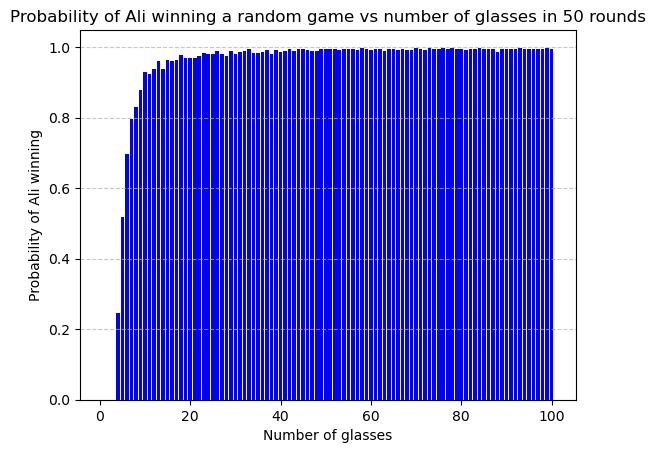

In [33]:
sample_size = 1000 #how many samples for each number of glasses 
rounds=50 #how many rounds they play before the game ends
glass_range = 100 #play from 1 glass to glass range

probs = ex1 / sample_size 
x_vals = np.arange(1,glass_range+1)
#print(probs)

#using 1000 sample size
plt.bar(x_vals, probs, color='blue')
plt.xlabel("Number of glasses")
plt.ylabel("Probability of Ali winning")
plt.title(f"Probability of Ali winning a random game vs number of glasses in {rounds} rounds")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Now for some more zoomed in plots, considering less glasses, and differing the number of rounds aswell.

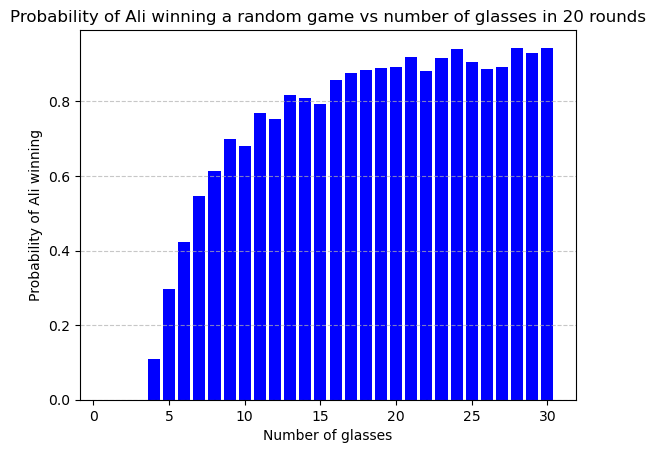

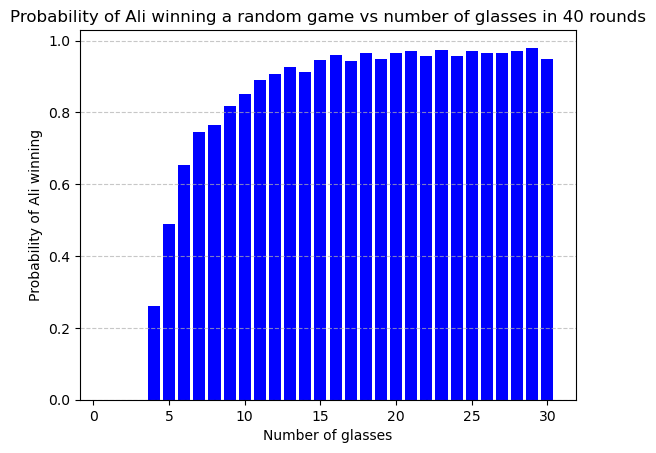

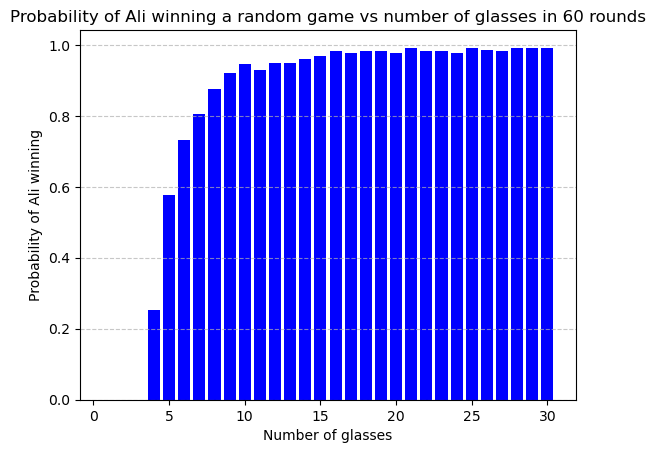

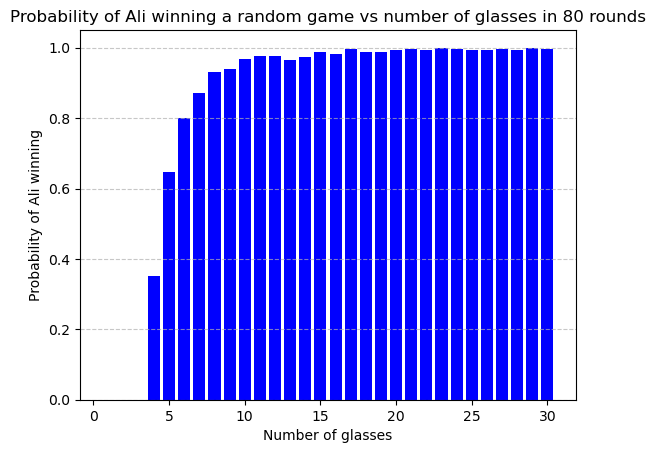

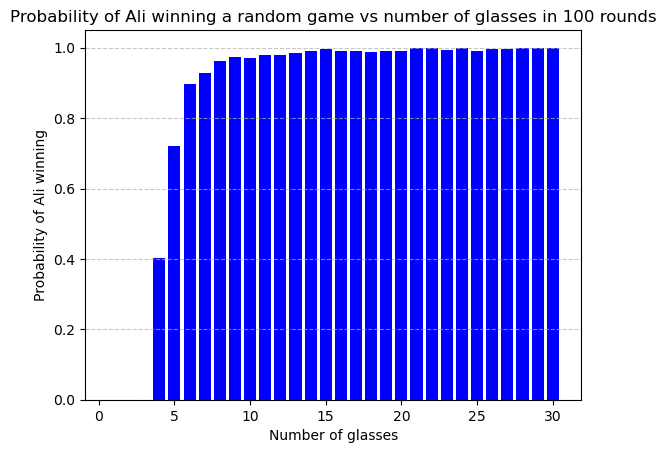

In [34]:
for rounds in [20,40,60,80,100]:
    ss = 500
    glass_range=30
    counts = simulation(ss, rounds, glass_range) #sample size 100 each time, 40 glasses max
    probs = counts/ss
    x_vals = np.arange(1,glass_range+1)
    
    plt.bar(x_vals, probs, color='blue')
    plt.xlabel("Number of glasses")
    plt.ylabel("Probability of Ali winning")
    plt.title(f"Probability of Ali winning a random game vs number of glasses in {rounds} rounds")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

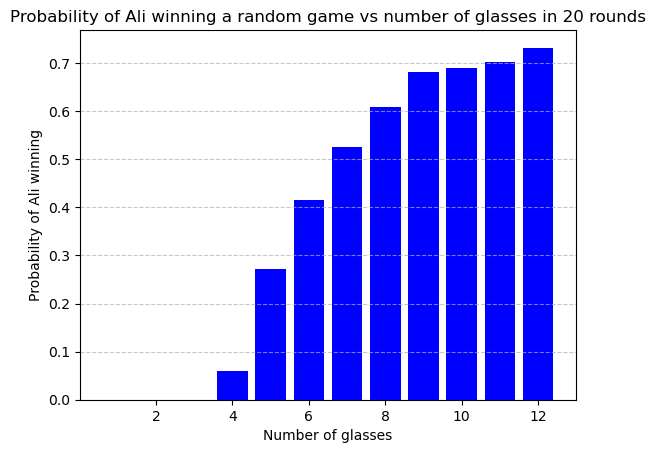

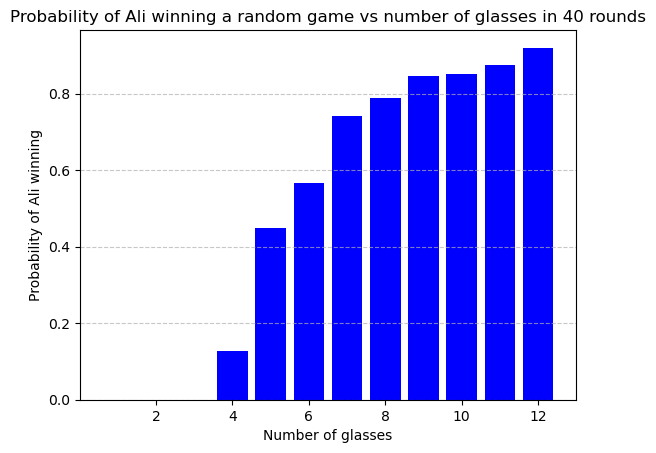

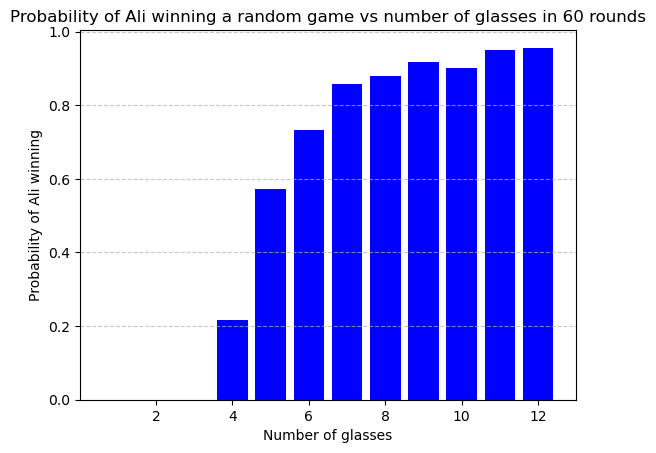

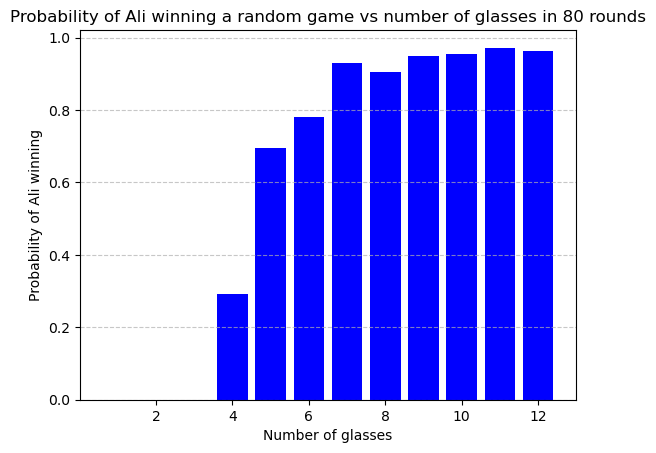

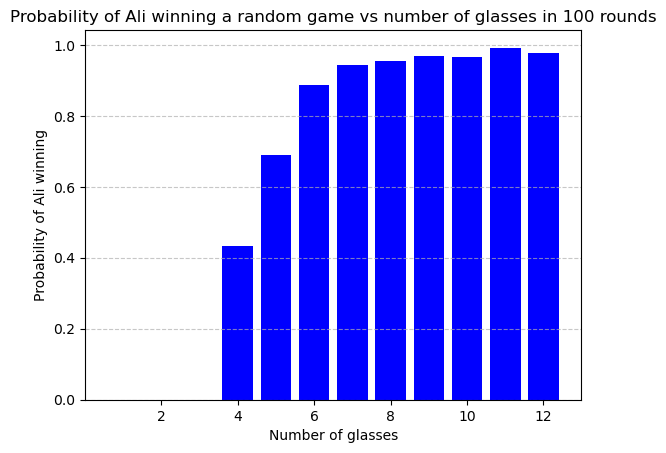

In [35]:
for rounds in [20,40,60,80,100]:
    ss = 500
    glass_range=12
    counts = simulation(ss, rounds, glass_range) #sample size 100 each time, 40 glasses max
    probs = counts/ss
    x_vals = np.arange(1,glass_range+1)
    
    plt.bar(x_vals, probs, color='blue')
    plt.xlabel("Number of glasses")
    plt.ylabel("Probability of Ali winning")
    plt.title(f"Probability of Ali winning a random game vs number of glasses in {rounds} rounds")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

There are quite a few somewhat interesting observations to make here. A less interesting one is as the number of rounds we allow increases, Ali is more likely to win for all numbers of glasses. This makes sense as this is the only win condition we could instill for Beth, otherwise they would play potentially forever until Ali wins a game, so we are making it harder for Beth to win and giving Ali more time to win. 

Also, We see as the number of glasses goes up Ali is more likely to win. This is quite interesting and kind of matches how in the attack phase and extensions Ali needs many glasses in order to beat a strategic Beth. Here the likely advantage is that Beth is limited in how many glasses she can remove at a time, and so if Ali is filling them randomly and Beth removes them randomly, its more likely for one glass to slowly be filled and Beth not remove it. 

Furthermore, the fact that it only takes between 4 and 6 glasses for Ali to reach a probability of winning of 0.5, despite the fact it is impossible for him to win with two glasses on the table and effectively impossible with 3 glasses, aswell as that after even just 10 glasses he is almost guaranteed to win, even within 20 rounds is quite a testiment to how much of an advantage he has in this game, especially for larger numbers of glasses.

## Plots for generalisations

This final part is just doing the plotting I did in my extension. Namely, to solve for the smallest integers $n$ st $
\sum_{k=1}^n \frac{1}{k} > \frac{1}{x}-1$ for $x \in (0,1]$ and therefore a potentially lower bound on how many glasses we need for Ali to have a winning strategy in each of our generalisations.

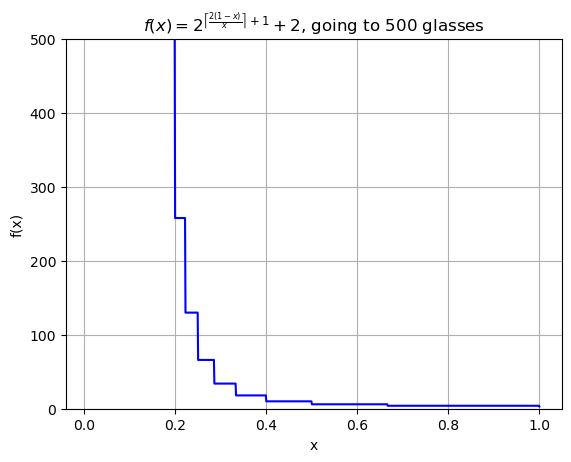

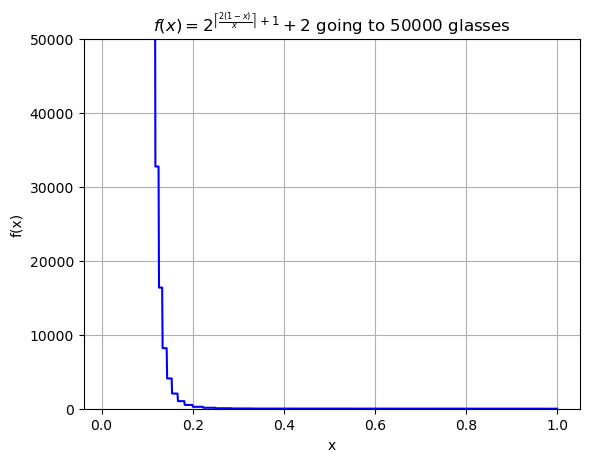

In [44]:
#Firstly, would like to plot our first method

def f(x):
        val = 2 * (1 - x) / x
        floored = np.ceil(val)
        return 2 ** (floored) + 2


x_vals = np.linspace(0.01, 1, 1000)
y_vals = f(x_vals)

plt.plot(x_vals, y_vals, color='blue')
plt.title(r'$f(x) = 2^{\left\lceil \frac{2(1-x)}{x} \right\rceil + 1} + 2$, going to 500 glasses')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.ylim(bottom=0, top=500) 
plt.show()

plt.plot(x_vals, y_vals, color='blue')
plt.title(r'$f(x) = 2^{\left\lceil \frac{2(1-x)}{x} \right\rceil + 1} + 2$ going to 50000 glasses')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.ylim(bottom=0, top=50000) 
plt.show()


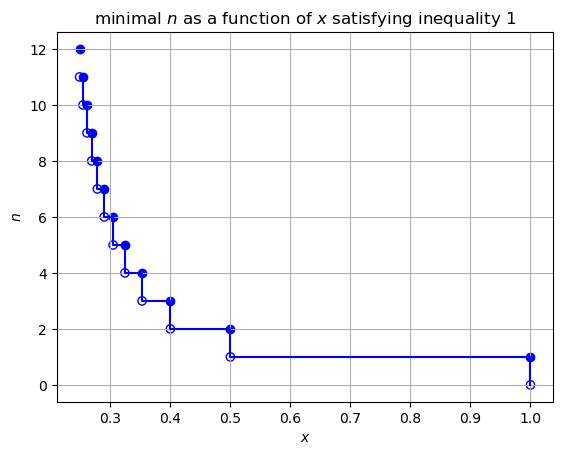

In [45]:
#for the minimal number of glasses method
#we can use a plot to know what values we want, by instead calculating x in terms of m and flipping our axis

def harmonic_sum(m):#compute harmonic sum
    return sum(1 / k for k in range(1, m + 1))

#function for threshold x_min
def x_min(m):
    H_m = harmonic_sum(m)  
    return 1 / (1 + H_m)

m_values = np.arange(0, 12)  # m from 1 to however high we want to go
#print(m_values)
#print(harmonic_sum(1))
x_values = [x_min(m) for m in m_values] #which x's correspond to each m


plt.step(x_values, m_values, where='pre', color='blue') #should plot as a step, we find the minimum x for a given m and then use next m to extrapolate
plt.scatter(x_values, m_values, facecolors='none', edgecolors='blue', marker='o')
plt.scatter(x_values, m_values+1, color = "blue", edgecolors='blue', marker='o')
plt.ylabel("$n$")
plt.xlabel("$x$")
plt.title("minimal $n$ as a function of $x$ satisfying inequality 1")
plt.grid(True)
plt.show()


Now plot how many glasses on the table this would be

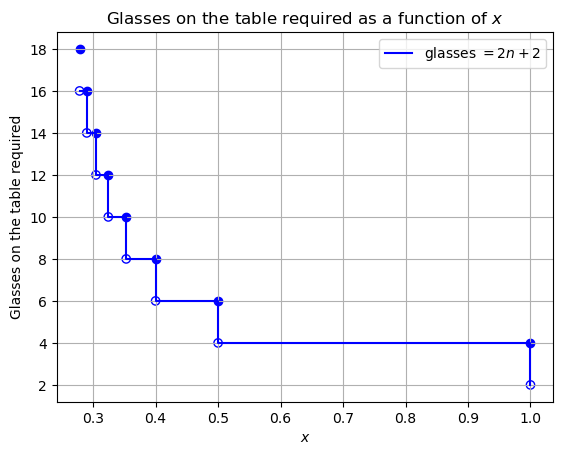

In [46]:

m_values = np.arange(0, 8)  # m from 1 to 8
#print(m_values)
#print(harmonic_sum(1))
x_values = [x_min(m) for m in m_values]



plt.step(x_values, 2*m_values+2, where='pre', color='blue', label=r'glasses $=2n+2$')
plt.scatter(x_values, 2*m_values+2, facecolors='none', edgecolors='blue', marker='o')
plt.scatter(x_values, 2*m_values+4, color = "blue", edgecolors='blue', marker='o')
plt.ylabel("Glasses on the table required")
plt.xlabel("$x$")
plt.title("Glasses on the table required as a function of $x$")
plt.grid(True)
plt.legend()
plt.show()


In [72]:
def f(x):
     result = np.ceil((2 * (1 - x)) / x)  # Use ceiling function
     return 2**(result) +2 
    
m_values = np.arange(0, 50000)
x_values = [x_min(m) for m in m_values]
x_vals = np.linspace(0.1,1,1000)
y_values = f(np.array(x_vals))

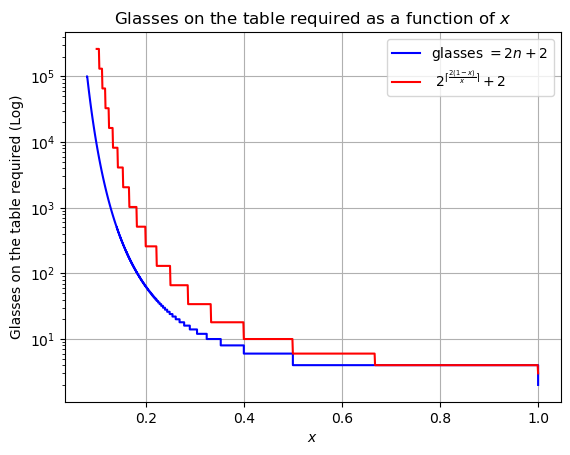

In [73]:
plt.step(x_values, 2*m_values+2, where='pre', color='blue', label=r'glasses $=2n+2$')
plt.plot(x_vals, y_values, color = "red", label= r" $2^{\lceil \frac{2(1-x)}{x} \rceil} + 2$")
plt.ylabel("Glasses on the table required (Log)")
plt.xlabel("$x$")
plt.title("Glasses on the table required as a function of $x$")
plt.grid(True)
plt.yscale("log")
plt.legend()
plt.show()   